# Test Notebook for \Phi Solution Code

Import dependencies:

In [28]:
import networkx
import epydemic
import numpy as np
import matplotlib.pyplot as plt

from epydemic import SEIR, ProcessSequence, Monitor, ERNetwork, BANetwork, StochasticDynamics
from epyc import Experiment

Sample test set-up:

In [32]:
T = 50
N = 100
g = BANetwork()
p = SEIR()
param = dict()

param[BANetwork.N] = N
param[BANetwork.M] = 2

param[SEIR.P_INFECT_SYMPTOMATIC] = 0.1      # jnfection rate
param[SEIR.P_INFECT_ASYMPTOMATIC] = 0       # NO probability of asymp infection
param[SEIR.P_SYMPTOMS] = 0.04               # latency/incubation rate
param[SEIR.P_REMOVE] = 0.1                  # removal/recovery rate
param[SEIR.P_EXPOSED] = 0.01                # the random fraction of nodes initially infected
param[Monitor.DELTA] =20


e = StochasticDynamics(p, g)
rc = e.set(param).run()
n= p._finalNetwork            # access the final network of the simulation

Print final simulation network and graph:

Graph with 100 nodes and 196 edges
results: 
 {'parameters': {'N': 100, 'MperNode': 2, 'epydemic.seir.pInfect': 0.1, 'epydemic.seir.pInfectAsymp': 0, 'epydemic.seir.pSymptoms': 0.04, 'epydemic.seir.pRemove': 0.1, 'epydemic.seir.pExposed': 0.01, 'epydemic.monitor.time_delta': 20, 'topology': 'BA'}, 'metadata': {'epyc.experiment.classname': 'epydemic.stochasticdynamics.StochasticDynamics', 'epyc.experiment.start_time': datetime.datetime(2023, 4, 9, 23, 57, 3, 7164), 'epyc.experiment.setup_time': 0.009871, 'epydemic.monitor.time': 311.3779504752654, 'epydemic.monitor.events': 236, 'epyc.experiment.experiment_time': 0.052519, 'epyc.experiment.teardown_time': 0.0, 'epyc.experiment.end_time': datetime.datetime(2023, 4, 9, 23, 57, 3, 69554), 'epyc.experiment.elapsed_time': 0.06239, 'epyc.experiment.status': True}, 'results': {'epydemic.seir.S': 21, 'epydemic.seir.E': 0, 'epydemic.seir.I': 0, 'epydemic.seir.R': 79}}


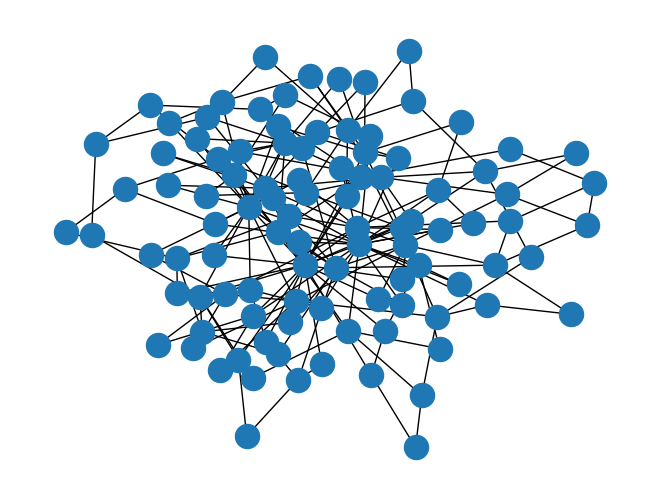

In [33]:
print(n)
print("results: \n", rc)
# Graph the network
nx.draw(n)
plt.show()

To test network properties and access:

In [37]:
# Tests
print(type(n))                         
print(list(n.nodes))                    # list of nodes of the network
print(n.degree[1])                      # degree of node 1
print(list(n.adj[1]))                   # neighbors of node 1 (gives adjacency list)
#print(list(n.neighbors(1)))             # alternative neighbors list
print(n.nodes[9])                       # attributes of node 1

print(n.nodes[1]['compartment-23'])      # compartment of node 1

<class 'networkx.classes.graph.Graph'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
21
[0, 3, 5, 12, 16, 17, 20, 22, 24, 28, 31, 33, 43, 62, 63, 64, 68, 73, 75, 78, 94]
{'compartment-23': 'epydemic.seir.R', 'tHitting-23': 107.29070194643354}
epydemic.seir.R


Now, let us take a set of nodes that belong to a specified compartment and store it in a list. Then in this list, create another list of nodes that are of degree k.

In [39]:
# create list of nodes x that satisfy attribute y, i.e. nodes in the specific compartment
compartment = [x for x,y in n.nodes(data=True) if y['compartment-23']=='epydemic.seir.S']
print("nodes in compartment:", compartment)

# among the nodes in the compartment, create list of nodes with certain degree k
k = 7
nodesInComp_degk = [x for x in compartment if n.degree[x] == k]
print("nodes with degree k=5 in compartment:", nodesInComp_degk)
#print(nodesInComp_degk[1])

nodes in compartment: [12, 15, 16, 26, 36, 37, 43, 52, 54, 58, 59, 60, 66, 68, 78, 88, 91, 93, 95, 97, 99]
nodes with degree k=5 in compartment: []


Code for plotting the degree distribution:

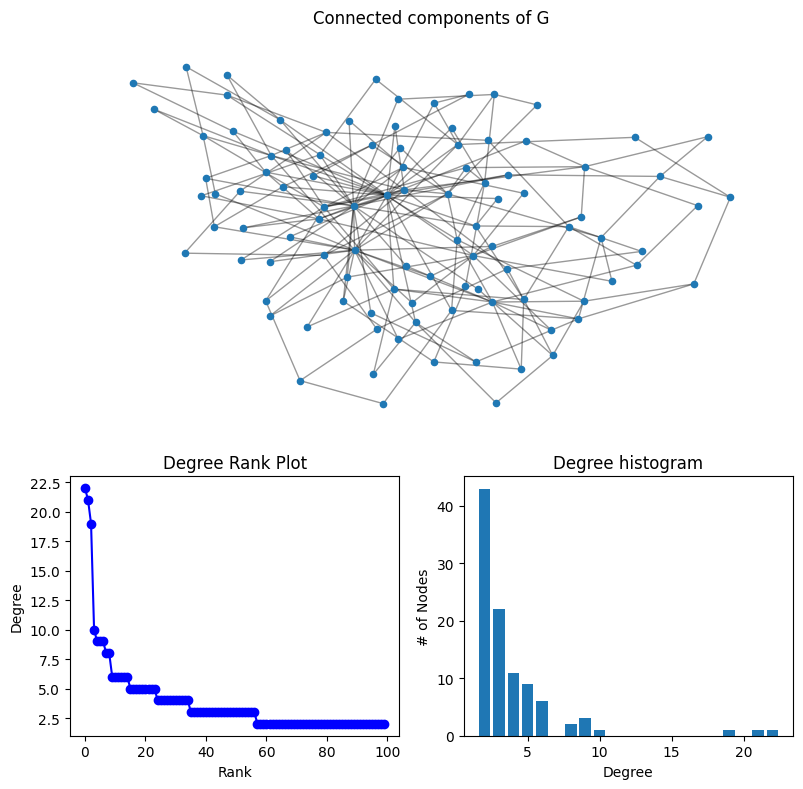

In [40]:
#### DEGREE HIST
#G = nx.gnp_random_graph(100, 0.02, seed=10374196)
G =  n

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [ ]:
def Phi():
    